In [43]:
#load libraries
library(ggplot2)
library("speedyseq")
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
library(vegan)
library("lubridate")
library('PCAtools')
library("DESeq2")
library("GGally")
library("ggpmisc")
library(patchwork)
library(ggtext)
library("ggcorrplot")
library("ggplotify")
library(microViz)
library(ggpubr)

In [2]:
#load count and taxonomy data
load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_counts_4_analysis.RData")
load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_taxo_4_analysis.RData")

In [3]:
## load taxonomy and add names to missing taxonomy
taxo_mat <- as.data.frame(POR_taxo_4_analysis) %>%
  rownames_to_column %>%
column_to_rownames("rowname")  %>%
#mutate(family = ifelse(row.names(.) == "ASV_94", "ASV_94:Bacteroidia", family)) %>%
#mutate(family = ifelse(row.names(.) == "ASV_68", "ASV_68", family)) %>%
  mutate(domain = ifelse(row.names(.) == "ASV_5", "ASV_5:core", domain)) %>%
  mutate(phylum = ifelse(row.names(.) == "ASV_5", "ASV_5:core", phylum)) %>%
  mutate(class = ifelse(row.names(.) == "ASV_5", "ASV_5:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_5", "ASV_5:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_5", "ASV_5:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_5", "ASV_5:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_5", "ASV_5:core", species)) %>%
 mutate(domain = ifelse(row.names(.) == "ASV_6", "ASV_6:core", domain)) %>%
  mutate(phylum = ifelse(row.names(.) == "ASV_6", "ASV_6:core", phylum)) %>%
  mutate(class = ifelse(row.names(.) == "ASV_6", "ASV_6:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_6", "ASV_6:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_6", "ASV_6:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_6", "ASV_6:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_6", "ASV_6:core", species)) %>%
mutate(class = ifelse(row.names(.) == "ASV_7", "SAR324:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_7", "SAR324:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_7", "SAR324:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_7", "SAR324:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_7", "SAR324:core", species)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_23", "Cyanobiaceae:core", order)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_23", "Cyanobiaceae:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_23", "Cyanobiaceae:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_23", "Cyanobiaceae:core", species)) %>%
#rownames_to_column("ASV") %>% 
#mutate(ASVs = ASV) %>%  column_to_rownames("ASV") %>% 
as.matrix()
count_mat <- as.matrix(POR_counts_4_analysis)

In [4]:
#import metadata and rename habitat variables
meta = read.csv ("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_combo_meta.csv",
row.names=1, header = T) %>%
mutate(
    Month = factor(Month, levels = month.name)
  ) %>%
arrange(Month) %>%
arrange(collection_date) %>% 
rename(cluster_depth = "Depth") %>% 
rename(avgSST_degC = "SST")  %>% 
rename(PO4.uM. = "Phosphate") %>%
rename(Si.uM. = "Silica") %>%
rename(NO2.uM. = "Nitrite") %>%
rename(NO3.uM. = "Nitrate") %>%
rename(Speed.cm.s. = "Currents") %>%
rename(avgchla_mgm.3 = "Chlorophyll.a")


head(meta, n=2) #view metadata
colnames(meta) #view colnames

,collection_date,Currents,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,Fragment_number,Month,⋯,Depth,depth,Year.y,Month.y,Lat_decimal,Long_decimal,Chlorophyll.a,sdchla_mgm.3,SST,sdSST_degC
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,⋯,<dbl>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-584,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,3,March,⋯,-15.7,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
bagnumber-585,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,4,March,⋯,-15.7,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825


[1] "collection_date"       "Currents"              "Bearing.degrees."     
 [4] "Velocity.N.cm.s."      "Velocity.E.cm.s."      "Temperature.C."       
 [7] "reef"                  "Genotype"              "Fragment_number"      
[10] "Month"                 "Year"                  "Fragment_num"         
[13] "day"                   "Survey"                "LiveFrag"             
[16] "Survivorship_reef"     "Survivorship"          "L"                    
[19] "W"                     "H"                     "Adjusted.Area"        
[22] "S01FragCount"          "Year.x"                "Silica"               
[25] "Nitrite"               "N.N.uM."               "Nitrate"              
[28] "Phosphate"             "sample_ID"             "sample_ID2"           
[31] "Health"                "Month.x"               "Samp_trip"            
[34] "joining_info"          "order"                 "species"              
[37] "time_Reef"             "Cluster"               "sampling_trip"        
[40] "geno_clus"             "X"                     "colour_reef"          
[43] "colour_genotype"       "colour_reef_genotype"  "colour_timepoint"     
[46] "colour_timepoint_reef" "cluster_latitude"      "cluster_longitude"    
[49] "Depth"                 "depth"                 "Year.y"               
[52] "Month.y"               "Lat_decimal"           "Long_decimal"         
[55] "Chlorophyll.a"         "sdchla_mgm.3"          "SST"                  
[58] "sdSST_degC"

In [5]:
#Import counts, taxonomy, and metadata  into phyloseq object
ASV <- otu_table(as.matrix(POR_counts_4_analysis), 
                 taxa_are_rows = T)
TAX <- tax_table(as.matrix(taxo_mat)) 

SAMP <- sample_data(meta)

ps <- phyloseq(ASV, TAX, SAMP)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 27534 taxa and 363 samples ]:
sample_data() Sample Data:        [ 363 samples by 58 sample variables ]:
tax_table()   Taxonomy Table:     [ 27534 taxa by 7 taxonomic ranks ]:
taxa are rows

In [6]:
#list of ASVs that Blasted as Eukaryote
euk_asvs <- c("ASV_10673","ASV_10883",	"ASV_11806","ASV_12333",	"ASV_12335",	"ASV_13587",	"ASV_14757",	"ASV_15238",	"ASV_15259",	"ASV_16364",	"ASV_16936",	"ASV_17406",	"ASV_18096",	"ASV_18375",	"ASV_18682",	"ASV_19529",	"ASV_19795",	"ASV_19953",	"ASV_2",	"ASV_20640",	"ASV_2100",	"ASV_22284",	"ASV_22692",	"ASV_23038",	"ASV_23144",	"ASV_24135",	"ASV_24243",	"ASV_27014",	"ASV_29665",	"ASV_30547",	"ASV_30626",	"ASV_30884",	"ASV_4161",	"ASV_4498",	"ASV_476",	"ASV_4797",	"ASV_4966",	"ASV_5018",	"ASV_5118",	"ASV_5154",	"ASV_6282",	"ASV_653",	"ASV_6843",	"ASV_7264",	"ASV_7427",	"ASV_8",	"ASV_9248",	"ASV_9692")
#Remove taxa that was assigned as Eukaryote
allTaxa = taxa_names(ps)
allTaxa <- allTaxa[!(allTaxa %in% euk_asvs)]
ps_fill_euk = prune_taxa(allTaxa, ps) 
ps_fill_euk # new phyloseq object with removed eukaryotes

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 27486 taxa and 363 samples ]:
sample_data() Sample Data:        [ 363 samples by 58 sample variables ]:
tax_table()   Taxonomy Table:     [ 27486 taxa by 7 taxonomic ranks ]:
taxa are rows

In [7]:
#filter samples only sampled once
extras=c("apal_cf_gCN2_cl6_fr5_AH_2019-09-25",
  "apal_ndr_gCN2_cl15_fr4_AH_2019-11-19",
  "apal_pr_gCN2_cl75_fr6_AH_2019-11-18",
  "apal_ndr_gCN4_cl32_frB_AH_2019-11-19",
  "apal_pr_gCN4_cl98_fr4_AH_2019-09-26",
  "apal_cf_gHS1_cl15_frB_AH_2019-11-19",
  "apal_pr_gHS1_cl106_fr7_AH_2019-11-18",
  "apal_pr_gHS1_cl108_fr3_AH_2019-11-18",
  "apal_ndr_gML2_cl18_fr6_AH_2019-11-19",
  "apal_ndr_gCN1_cl17_fr4_AH_2019-09-25",
  "apal_pr_gCN4_cl98_fr4_AH_2019-09-26",
  "apal_pr_gHS1_cl106_fr6_AH_2019-07-02",
  "apal_pr_gHS1_cl106_fr7_AH_2019-03-01",
  "apal_pr_gHS1_cl106_fr7_AH_2019-11-18",
  "apal_pr_gHS1_cl108_fr3_AH_2019-11-18",
  "apal_pr_gML2_cl58_frA_AH_2019-11-18",
        "apal_pr_gCN2_cl81_fr6_AH_2019-09-26",
        "apal_pr_gCN2_cl81_fr4_AH_2019-09-26",
        "apal_ndr_gCN4_cl38_frB_AH_2019-11-19",
        "apal_ndr_gCN4_cl38_fr5_AH_2019-11-19",
        "apal_ndr_gCN1_cl17_fr4_AH_2019-09-25")


ps_fill_samp = subset_samples(ps_fill_euk, !sample_ID %in% extras)
ps_fill_samp

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 27486 taxa and 346 samples ]:
sample_data() Sample Data:        [ 346 samples by 58 sample variables ]:
tax_table()   Taxonomy Table:     [ 27486 taxa by 7 taxonomic ranks ]:
taxa are rows

In [8]:
#Combine samples collected from the same cluster on the same date
ps_merge = merge_samples2(ps_fill_samp, "geno_clus")
ps_merge

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 27486 taxa and 124 samples ]:
sample_data() Sample Data:        [ 124 samples by 58 sample variables ]:
tax_table()   Taxonomy Table:     [ 27486 taxa by 7 taxonomic ranks ]:
taxa are rows

In [9]:
#filter to remove noise from data
ps_fill = filter_taxa(ps_merge, function(x) sum(x > 10) > (0.15*length(x)), TRUE) %>% tax_fix()
ps_fill 

Row named: ASV_10
contains no non-unknown values, returning:
'ASV_10' for all replaced levels.
Consider editing this tax_table entry manually.

Row named: ASV_13
contains no non-unknown values, returning:
'ASV_13' for all replaced levels.
Consider editing this tax_table entry manually.

Row named: ASV_21
contains no non-unknown values, returning:
'ASV_21' for all replaced levels.
Consider editing this tax_table entry manually.

Row named: ASV_25
contains no non-unknown values, returning:
'ASV_25' for all replaced levels.
Consider editing this tax_table entry manually.

Row named: ASV_68
contains no non-unknown values, returning:
'ASV_68' for all replaced levels.
Consider editing this tax_table entry manually.

Row named: ASV_88
contains no non-unknown values, returning:
'ASV_88' for all replaced levels.
Consider editing this tax_table entry manually.

Row named: ASV_110
contains no non-unknown values, returning:
'ASV_110' for all replaced levels.
Consider editing this tax_table entry m

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 464 taxa and 124 samples ]:
sample_data() Sample Data:        [ 124 samples by 58 sample variables ]:
tax_table()   Taxonomy Table:     [ 464 taxa by 7 taxonomic ranks ]:
taxa are rows

In [10]:
#set labels for Months and Reef
lab1=c("Feb-Mar", "Jun-Jul", "Sept", "Dec")
lab2=c("CF", "NDR", "PR")

## Main Figures

Dropping samples with missings: 1

Warning message in (function (mapping = NULL, data = NULL, stat = "identity", position = "identity", :
“Ignoring unknown parameters: `var_renamer`”


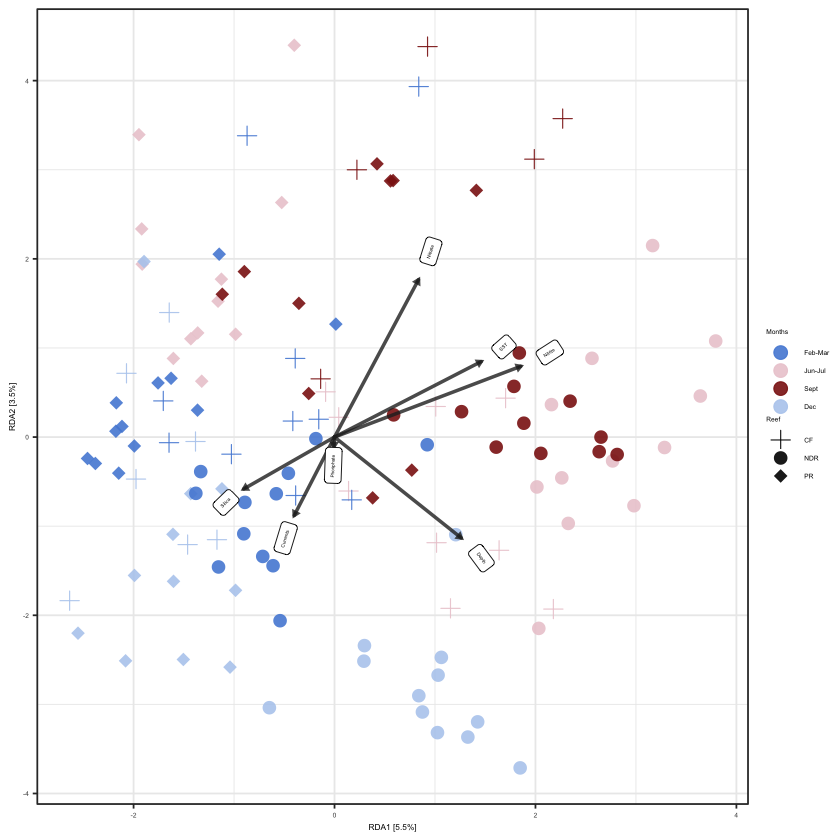

In [11]:
#Redundancy analysis figure

ord_RDA= ps_fill %>%
tax_fix() %>%
  tax_transform("clr", rank = "order") %>%
  ord_calc(
    constraints = c("Nitrite",
                               "SST",  "Nitrate", "Phosphate", "Currents", "Silica",
                                                "Depth"),
    scale_cc = FALSE)  %>%  # doesn't make a difference %>%
  
ord_plot(
    colour = "Samp_trip", size = 3.5, alpha = 0.9, shape = "reef",
    #plot_taxa = 1:5, 
    auto_caption = NA,  
     constraint_vec_style = vec_constraint(1, colour = "grey15"),
    constraint_lab_style = constraint_lab_style(
      max_angle = 90, size = 1, aspect_ratio = 1.5, colour = "black", var_renamer=c("NO2uM", "Temperature", "N2uM", "PO4.uM", 
                                                                                  "Speed.cm.s", "Si.uM", "Depth"),
    
  )) +
theme_bw() +
scale_color_manual("Months", values=c("#558bd9", "#EBCBD3", "#8c1c13", "#b6cdee"),  labels= lab1) +
scale_shape_manual("Reef", values=c(3, 16, 18, 18),  labels= lab2) +
theme(legend.title= element_text(size=3),
      legend.margin = margin(0, 0, 0, 0),
      legend.spacing.x = unit(0, "mm"),
      legend.spacing.y = unit(0, "mm"),
    # legend.position="top", legend.box = "vertical"
     ) +
  guides(
         color = guide_legend(order = 1, ncol=1, 
         keyheight = unit(0.15, 'inch'),
                             #title.position = "top", 
                              #title.hjust = 3
                             ), 
         shape = guide_legend(order = 2, ncol=1,
         keyheight = unit(0.15, 'inch'),
                             
                             #title.position = "top", 
                              #title.hjust = 0.5
                             )) +
theme(legend.text =element_text(size=4)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=4)) 
ord_RDA

#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/suppl_figTBD.png", 
 #     width = 4, height = 4, units = "in", dpi=300)

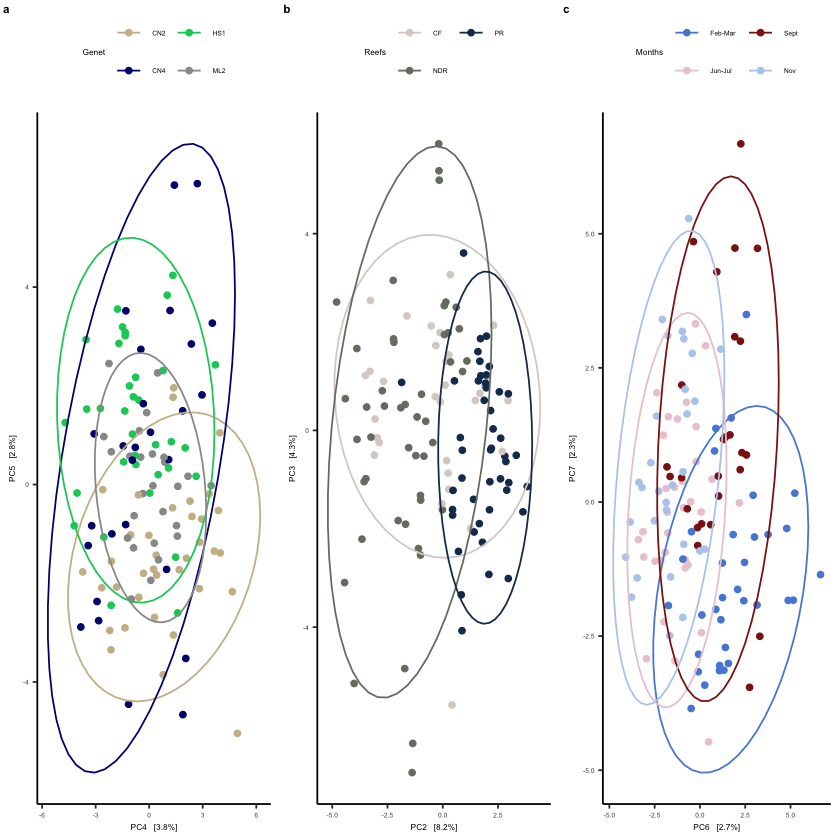

In [12]:
# transform counts into clr and ordinate
ps_clr <- microbiome::transform(ps_fill, 'clr')
psr_clr_ord <- ordinate(ps_clr, "RDA", "euclidean")

lab1=c("Feb-Mar", "Jun-Jul", "Sept", "Nov")
lab2=c("CF", "NDR", "PR")

fig_ord_geno = plot_ordination(ps_clr, psr_clr_ord,
                               color="Genotype",
                             # shape="reef",
                            axes = c(4,5)) +
#geom_point(size = .01) +
#scale_color_manual(values = c("#274e13","#76a5af","#837dbe", "#ed8655" )) +
scale_color_manual("Genet", values = c("wheat3","navy","springgreen3", "grey60" )) +

theme_classic() +
theme(legend.text =element_text(size=4),
      legend.position="top", 
      #egend.box = "vertical"
     ) +
theme(legend.title = element_text(size=5)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
guides(color = guide_legend(nrow = 2))+
stat_ellipse()


fig_ord_month=plot_ordination(ps_clr, psr_clr_ord,
                               color="Samp_trip",
                             # shape="reef",
                            axes = c(6,7)) +
#geom_point(size = .01) +
scale_color_manual("Months", values=c("#558bd9", "#EBCBD3", "#8c1c13", "#b6cdee"),  labels= lab1) +
theme_classic() +
theme(legend.text =element_text(size=4), 
      legend.position="top"
     ) +

theme(legend.title = element_text(size=5)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
guides(color = guide_legend(nrow = 2))+
stat_ellipse()



fig_ord_reef=plot_ordination(ps_clr, psr_clr_ord,
                               color="reef",
                             #shape="reef",
                            axes = c(2,3)) +
#geom_point(size = .01) +
scale_color_manual("Reefs", values = c("#dad1cb","#767e72","#16375b" ), labels= lab2) +
theme_classic() +
theme(legend.text =element_text(size=4), 
      legend.position="top"
     ) +
  guides(
         color = guide_legend(order = 1, ncol=1, 
         keyheight = unit(0.15, 'inch'),
                             #title.position = "top", 
                              #title.hjust = 3
                             )
                             ) +
theme(legend.title = element_text(size=5)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
guides(color = guide_legend(nrow = 2))+

stat_ellipse()

PCA_3 = ggpubr::ggarrange(fig_ord_geno, fig_ord_reef, fig_ord_month,
                  common.legend = FALSE, nrow=1, ncol=3,
                          labels = c("a", "b", "c"), font.label = list(size = 7))
PCA_3

#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/suppl_fig3.png", 
 #     width = 6.5, height = 4, units = "in", dpi=300)

#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/ord_bray.png", width = 4, height = 4, units = "in", dpi=300)     

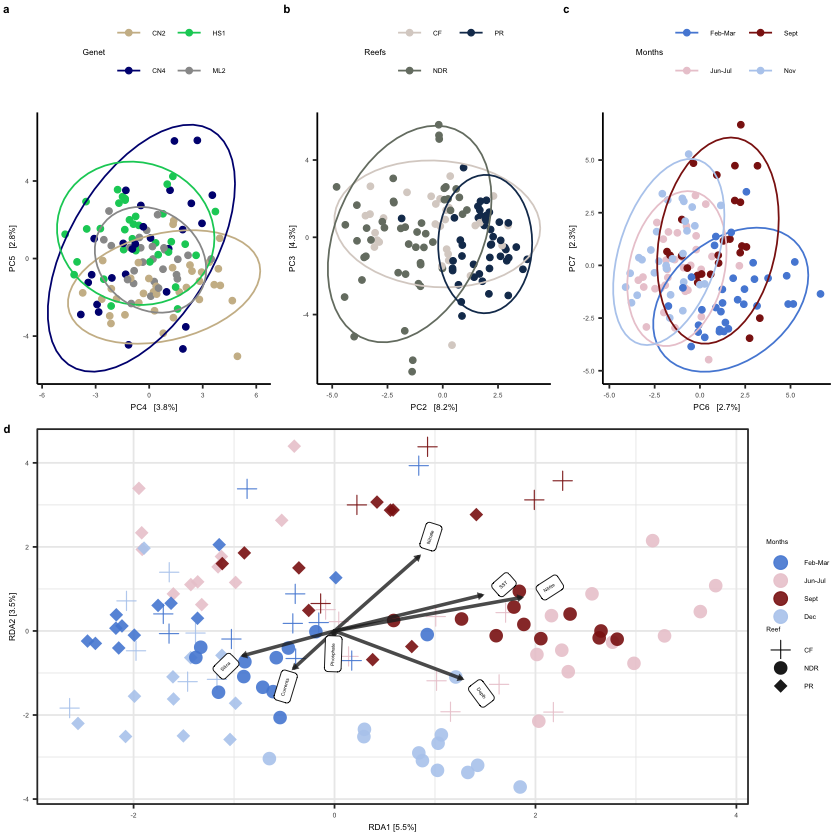

In [13]:
PCA_month = ggpubr::ggarrange(PCA_3 ,ord_RDA,
                  common.legend = FALSE, nrow=2, ncol=1,
                          labels = c("", "d"), font.label = list(size = 7))

PCA_month
#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/Fig3.png", 
 #   width = 5, height = 4.5, units = "in", dpi=300)

## Random forest for reef

In [14]:
#Read file generated by rf analysis and combined the output from  each reef
rf_reef_df = read.csv ("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/submitted/Revision1/SupplementaryData1.csv", 
                       header = T, stringsAsFactors = TRUE)

head(rf_reef_df, n=5)
dim(rf_reef_df)

,ID,ASV,all_importance,domain,phylum,class,order,family,genus,species,Taxa,Reef,value_importance
,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,cf_5.ASV_14,ASV_14,0.003450502,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrionaceae family,Vibrionaceae family,Vibrionales:ASV_14,cf,0.01315298
2,cf_5.ASV_288,ASV_288,0.001427871,Bacteria,SAR324 clade(Marine group B),SAR324 clade(Marine group B) phylum,SAR324 clade(Marine group B) phylum,SAR324 clade(Marine group B) phylum,SAR324 clade(Marine group B) phylum,SAR324 clade(Marine group B) phylum,SAR324 clade(Marine group B):ASV_288,cf,0.01534514
3,cf_5.ASV_6,ASV_6,0.002019325,ASV_6:core,ASV_6:core,ASV_6:core,ASV_6:core,ASV_6:core,ASV_6:core,ASV_6:core,ASV_6:core:ASV_6,cf,0.01315298
4,cf_5.ASV_610,ASV_610,0.001213038,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS5 marine group,NS5 marine group genus,Flavobacteriales:ASV_610,cf,0.01315298
5,cf_5.ASV_88,ASV_88,0.001837626,ASV_88,ASV_88,ASV_88,ASV_88,ASV_88,ASV_88,ASV_88,ASV_88:ASV_88,cf,0.01315298


[1] 15 13

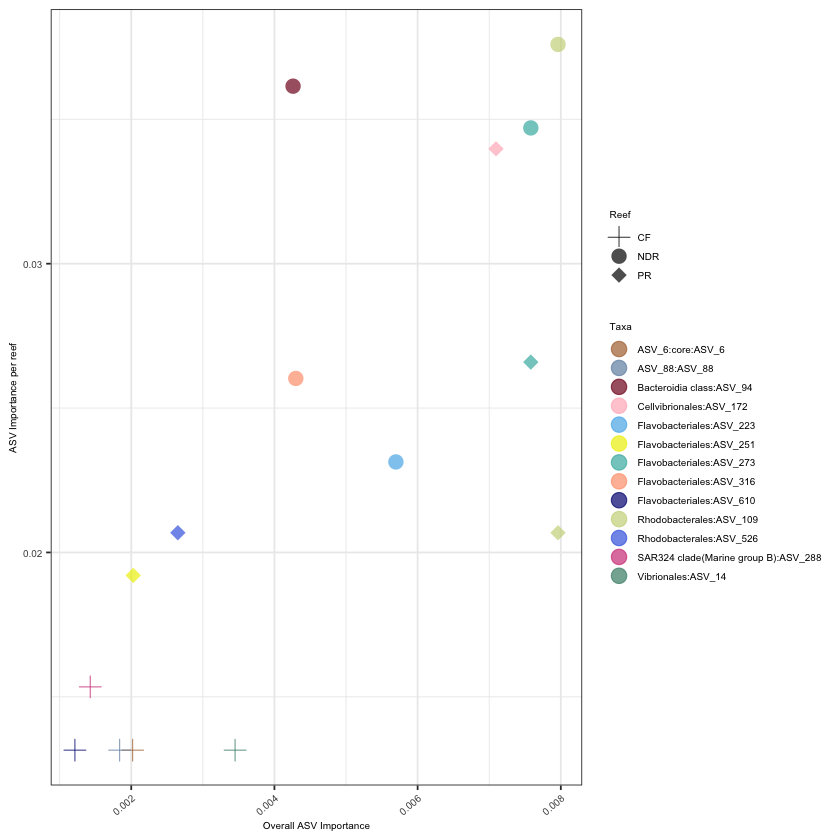

In [15]:
fig_rf_reef=rf_reef_df%>%
#mutate(order= paste(order:ASV, sep = ":"))  %>%
mutate_if(is.character, stringr::str_replace_all, pattern = "ASV_", replacement = "ASV ") %>%
mutate_if(is.character, stringr::str_replace_all, pattern = "clade", replacement = "\nclade") %>%

ggplot(
           aes(x=all_importance, y = value_importance)) + 
 
geom_point(aes(shape=Reef, color=Taxa), 
           alpha=0.7,
           size=4) +
scale_color_manual("Taxa", values=c( "#AD6F3B", "#6F8FAF", "#800020", "lightpink", "#56B4E9", 
                                    "yellow2", "#40B5AD",
                                    "lightsalmon", "#000080", "#CBD588", "royalblue", "#D14285", 
                                    "aquamarine4", "lightgreen", 
                                    "#5F7FC7", "#652926")) +
guides(fill = guide_legend(keywidth = 1, , keyheight =.40, ncol=1)) +
scale_shape_manual("Reef", values=c(3, 16, 18),  labels= lab2) +
ylab("ASV Importance per reef") +
xlab("Overall ASV Importance") +
theme_bw() +

theme(legend.text =element_text(size=6)) +
theme(legend.title = element_text(size=6),
    # legend.position = "top"
     ) +
  guides(shape = guide_legend(keywidth = 0.50, keyheight = 0.45, ncol=1, 
                             order = 1),
         color = guide_legend(order = 2, ncol=1, 
         keywidth = 0.50,  keyheight = 0.45,
                             #title.position = "top", 
                              #title.hjust = 3
                             )) +

theme(axis.text.x=element_text(angle = 40, hjust=1)) +
theme(strip.text.x = element_text(size=6)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6)) +
theme(axis.title.x = element_text(size =6)) +
theme(axis.title.y = element_text(size =6)) 
fig_rf_reef
#ggsave(filename = "/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/rf_reef.svg",
 #      plot = fig_rf_reef,
  #     width = 4.5,
   #    height = 4.5,
    #   units = "in",
     #  dpi = 300)

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 13 taxa and 124 samples ]:
sample_data() Sample Data:        [ 124 samples by 58 sample variables ]:
tax_table()   Taxonomy Table:     [ 13 taxa by 7 taxonomic ranks ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 13 taxa and 123 samples ]:
sample_data() Sample Data:        [ 123 samples by 58 sample variables ]:
tax_table()   Taxonomy Table:     [ 13 taxa by 7 taxonomic ranks ]:
taxa are rows

[1] "Genotype"  "Samp_trip" "reef"      "Currents"  "Nitrate"   "Nitrite"  
 [7] "Phosphate" "Silica"    "SST"       "Depth"

Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust vegan



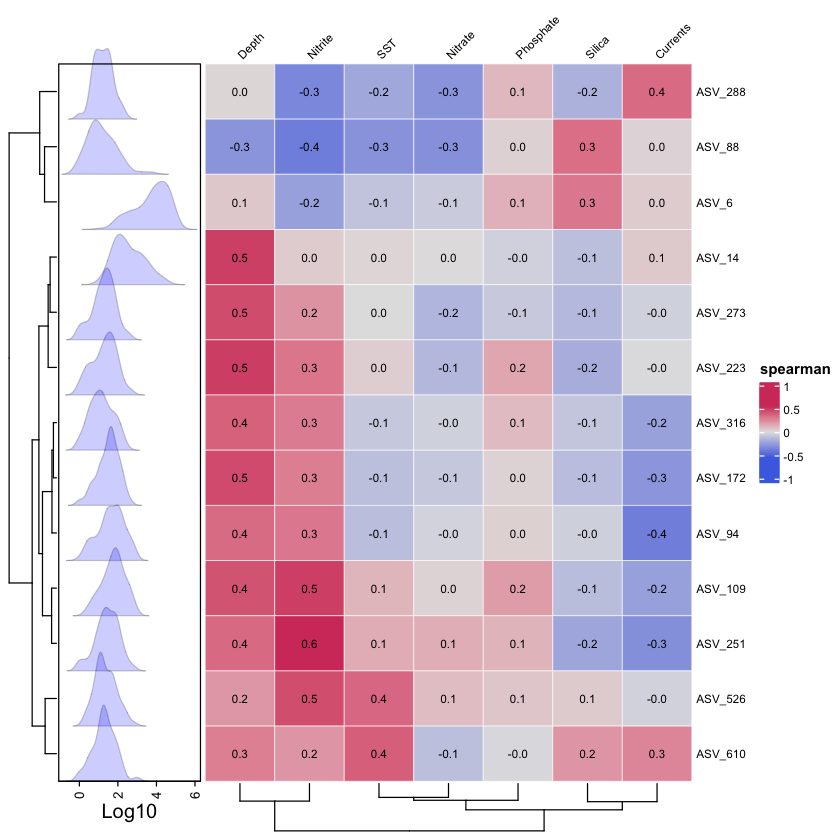

In [16]:
#RF ASVs subset 
GoodTaxa= c("ASV_288",
"ASV_6",
"ASV_610",
"ASV_88",
"ASV_109",
"ASV_223",
"ASV_273",
"ASV_316",
"ASV_94",
"ASV_172",
"ASV_273",
"ASV_109",
"ASV_526",
"ASV_251",
"ASV_14")

allTaxa = taxa_names(ps_merge)
allTaxa <- allTaxa[(allTaxa %in% GoodTaxa)]
ps_fill_tax = prune_taxa(allTaxa, ps_merge)
ps_fill_tax

#Remove the two samples that did not have depth information
ps_fill_tax =  subset_samples(ps_fill_tax, Depth!= "NA")
ps_fill_tax


#Select Metadata of interest 
ps_fill_tax_meta= data.frame(sample_data(ps_fill_tax)) %>% 
select("Genotype", "Samp_trip", "reef", 'Currents', 'Nitrate', 'Nitrite', 'Phosphate', 'Silica',
                 "SST", "Depth")

colnames(ps_fill_tax_meta)

#plot correlation map

fig_corr_reef=cor_heatmap(
  data = ps_fill_tax, cor = "spearman", vars = c("Nitrite",
                               "SST",  "Nitrate", "Phosphate", "Currents", "Silica",
                                                "Depth"),
 taxa_side = "left",    tax_anno = taxAnnotation(
    Log10 = anno_tax_density(
        #joyplot_scale = 1.5, 
        gp = grid::gpar(fill = "blue", alpha = 0.2),
        trans = "log10", zero_replace = 0.0001
 
 
    )))


gg_rf_reef= as.ggplot(fig_corr_reef)

gg_rf_reef

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 13 taxa and 123 samples ]:
sample_data() Sample Data:        [ 123 samples by 58 sample variables ]:
tax_table()   Taxonomy Table:     [ 13 taxa by 7 taxonomic ranks ]:
taxa are rows

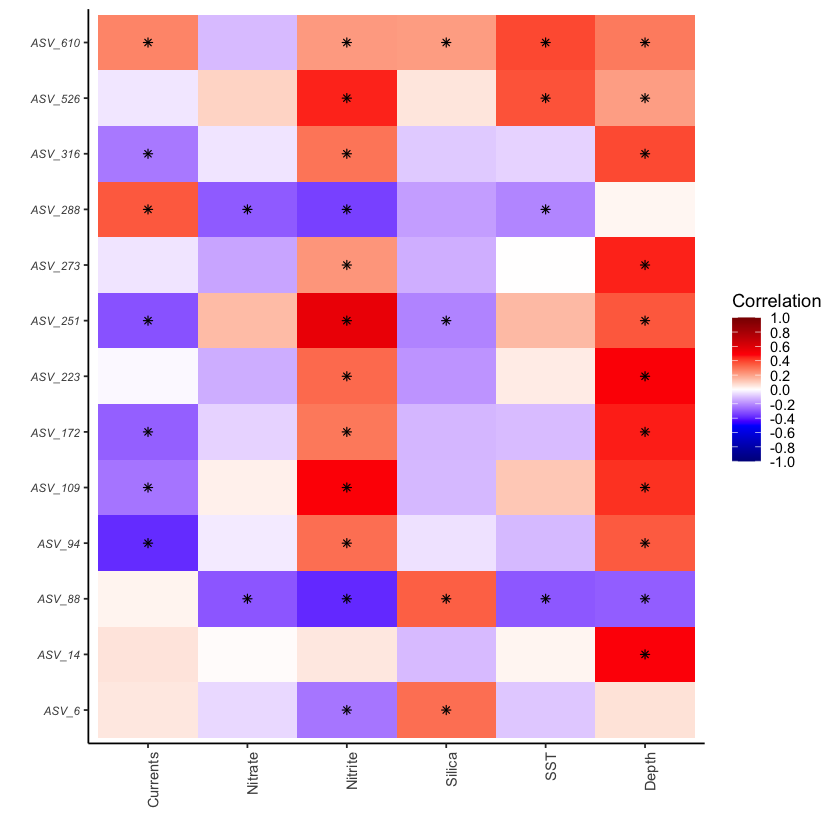

In [17]:
#Remove the two samples that did not have depth information
ps_fill_tax =  subset_samples(ps_fill_tax, Depth!= "NA")
ps_fill_tax
#Select Metadata of interest 
ps_fill_tax_meta= data.frame(sample_data(ps_fill_tax)) %>% 
select("Genotype", "Samp_trip", "reef", 'Currents', 'Nitrate', 'Nitrite', 'Phosphate', 'Silica',
                 "SST", "Depth")

# To identify significant correlations from the above figure
# Define data sets to cross-correlate 
x <- log10(otu_table(t(ps_fill_tax))) 

y <- as.matrix(ps_fill_tax_meta[4:10]) 

#correlate
correlation.table <- associate(x, y, method = "spearman", mode = "table", p.adj.threshold = 0.05, n.signif = 1) 

subtable <- filter(correlation.table, p.adj < 0.05)


# figure
correlation.table %>%
ggplot(aes(x = X2, y = X1, fill = Correlation)) + geom_tile(aes(fill = Correlation)) + 
geom_point(
    data = function(x) filter(x, p.adj < 0.05),
    shape = "asterisk"
  ) +
theme_classic() +
 scale_fill_gradientn("Correlation", 
                       breaks = seq(from = -1, to = 1, by = 0.2), 
                   colours = c("darkblue", "blue", "white", "red", "darkred"), 
                   limits = c(-1,1)) +
theme(axis.text.x=element_text(angle = 90, hjust=1),
               axis.text.y=element_text(size = 7, , face = "italic")) +
 xlab("") + ylab("")

Warning message in psmelt(.):
“The sample variables: 
order, species
 have been renamed to: 
sample_order, sample_species
to avoid conflicts with taxonomic rank names.”


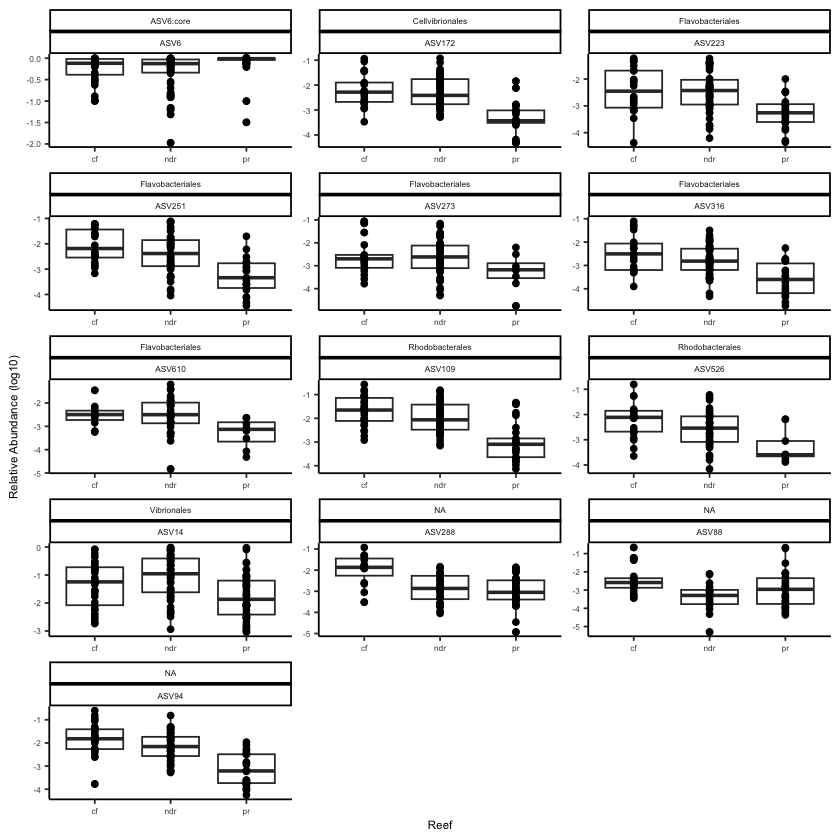

In [18]:
 #Transform to relative abundance and melt the data
ps_fill_tax %>%
  # tax_glom(taxrank = "species") %>%
  transform_sample_counts(function(x) { x / sum(x) }) %>% # Transform to relative abundance
  psmelt() %>%
  filter(Abundance != 0) %>%
  mutate_if(is.character, stringr::str_replace_all, pattern = "o__", replacement = "") %>%
  mutate_if(is.character, stringr::str_replace_all, pattern = "phylum", replacement = "") %>%
  mutate_if(is.character, stringr::str_replace_all, pattern = "ASV_", replacement = "ASV") %>%
  mutate_if(is.character, stringr::str_replace_all, pattern = "clade", replacement = "clade\n") %>%

# Create the plot
ggplot( aes(x = reef, y = log10(Abundance))) +
  geom_boxplot() +
  geom_point() +
  facet_wrap(order ~ OTU, scales = "free", nrow = 5) +
  guides(fill = guide_legend(keywidth = 1, keyheight = .40, ncol = 1)) +
  scale_shape_manual("Reef", values = c(3, 16, 18), labels = lab2) +
  xlab("Reef") +
  theme_classic() +
  theme(
    strip.text.x = element_text(size = 5),
    axis.text.x = element_text(size = 5),
    axis.text.y = element_text(size = 5),
    axis.title.x = element_text(size = 7),
    axis.title.y = element_text(size = 7)
  ) +
  ylab("Relative Abundance (log10)")

#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/suppleFig7.png", 
 #    width = 4, height = 6, units = "in", dpi=300)

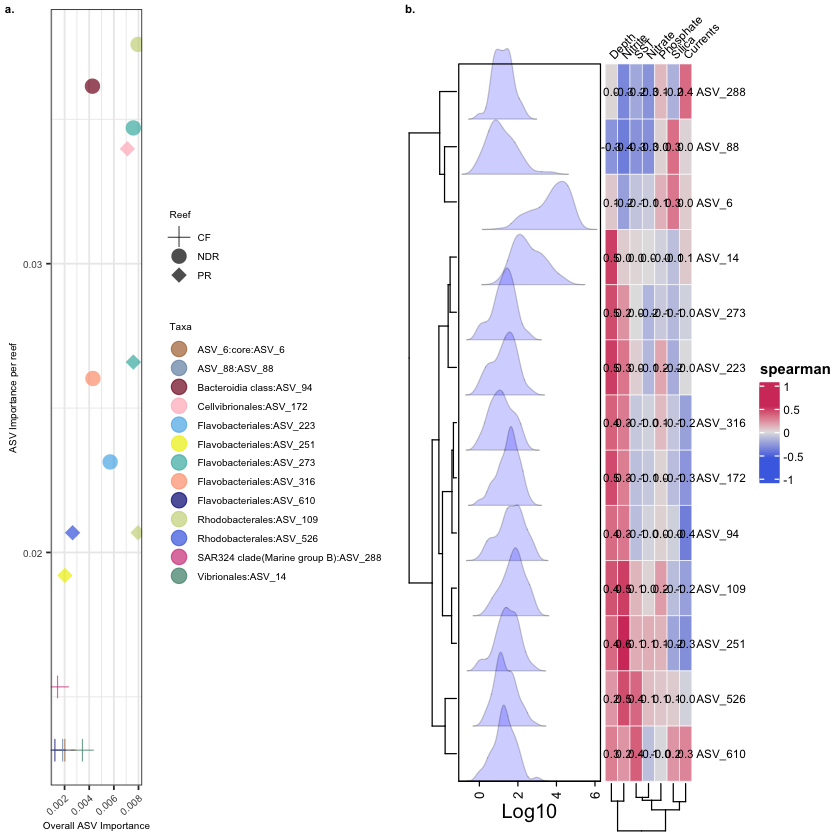

In [19]:
ggpubr::ggarrange(fig_rf_reef, gg_rf_reef,
                  common.legend = FALSE, nrow=1,
                labels = c("a.", "b."), font.label = list(size = 7),
                widths = c(1, 1.1), 
                  heights=c(1,1))

#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/Fig4.svg", 
 #    width = 8, height = 4, units = "in", dpi=300)

#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/Fig4.png", 
 #    width = 8, height = 4, units = "in", dpi=300)

## RF for month

In [20]:
rf_trip_df = read.csv ("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/submitted/Revision1/SupplementaryData2.csv",
                       header = T, stringsAsFactors = TRUE)

head(rf_trip_df, n=2)

,ID,ASV,all,domain,phylum,class,order,family,genus,species,Taxa,Month,value
,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,Trip_2_5.ASV_1038,ASV_1038,0.008336934,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS2b marine group,NS2b marine group genus,ASV_1038:Flavobacteriales,Feb-Mar,0.04996842
2,Trip_2_5.ASV_1262,ASV_1262,0.006496084,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS4 marine group,NS4 marine group genus,ASV_1262:Flavobacteriales,Feb-Mar,0.04796968


phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 19 taxa and 124 samples ]:
sample_data() Sample Data:        [ 124 samples by 58 sample variables ]:
tax_table()   Taxonomy Table:     [ 19 taxa by 7 taxonomic ranks ]:
taxa are rows

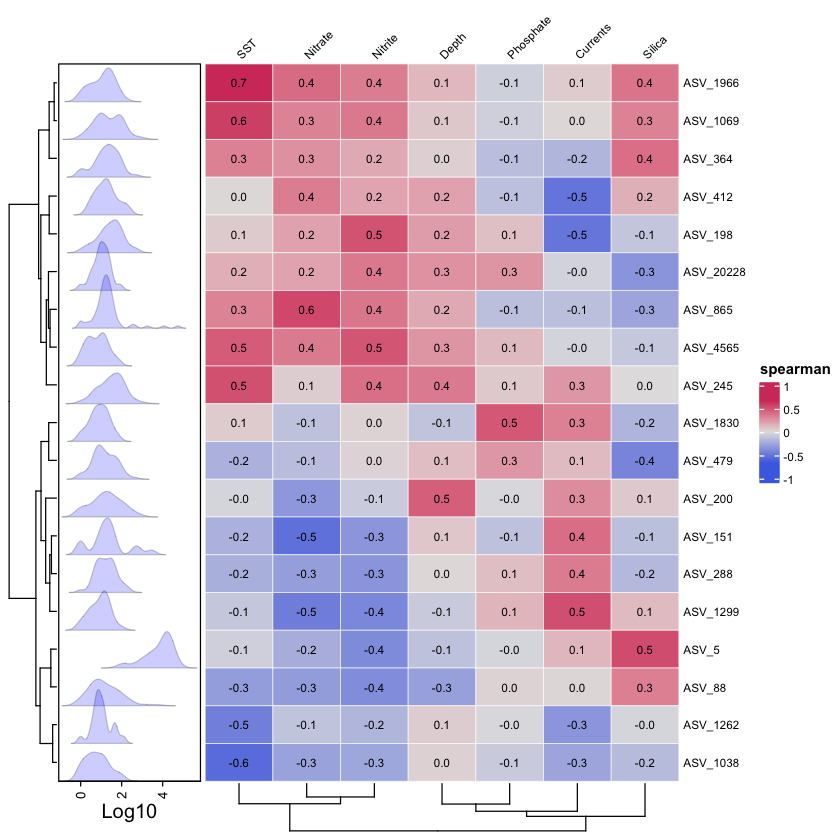

In [44]:
# Define taxa_trip
taxa_trip <- c("ASV_1038", "ASV_1262", "ASV_245", "ASV_412", "ASV_1830",
               "ASV_364", "ASV_1966", "ASV_479", "ASV_412", "ASV_1069",
               "ASV_288", "ASV_865", "ASV_5", "ASV_88", "ASV_20228",
               "ASV_4565", "ASV_1830", "ASV_151", "ASV_412", "ASV_1299",
               "ASV_865", "ASV_200", "ASV_198")

# Get all taxa names from ps_fill
allTaxa <- taxa_names(ps_merge)

# Identify taxa in taxa_trip that are present in allTaxa
commonTaxa <- taxa_trip[taxa_trip %in% allTaxa]

# Identify taxa in taxa_trip that are not present in allTaxa
missingTaxa <- taxa_trip[!taxa_trip %in% allTaxa]

# Print missing taxa for verification
if (length(missingTaxa) > 0) {
  print("The following taxa are not present in ps_fill:")
  print(missingTaxa)
}

# Prune ps_fill to include only the common taxa
ps_fill_tax <- prune_taxa(commonTaxa, ps_merge)

# Print the resulting object
ps_fill_tax

ps_fill_tax =  subset_samples(ps_fill_tax, Depth!= "NA")

ps_fill_tax_meta= data.frame(sample_data(ps_fill_tax)) %>% select("Genotype", "Samp_trip", "reef", 'Currents', 'Nitrate', 'Nitrite', 'Phosphate',
                                                                  'Silica',
                 "SST", "Depth")


fig_rf_month=cor_heatmap(
  data = ps_fill_tax, cor = "spearman", vars = c("Nitrite",
                               "SST",  "Nitrate", "Phosphate", "Currents", "Silica",
                                                "Depth"),
 taxa_side = "left",    tax_anno = taxAnnotation(
    Log10 = anno_tax_density(
        #joyplot_scale = 1.5, 
        gp = grid::gpar(fill = "blue", alpha = 0.2),
        trans = "log10", zero_replace = 0.0001
 
 
    )))



gg_rf_month= as.ggplot(fig_rf_month)
gg_rf_month

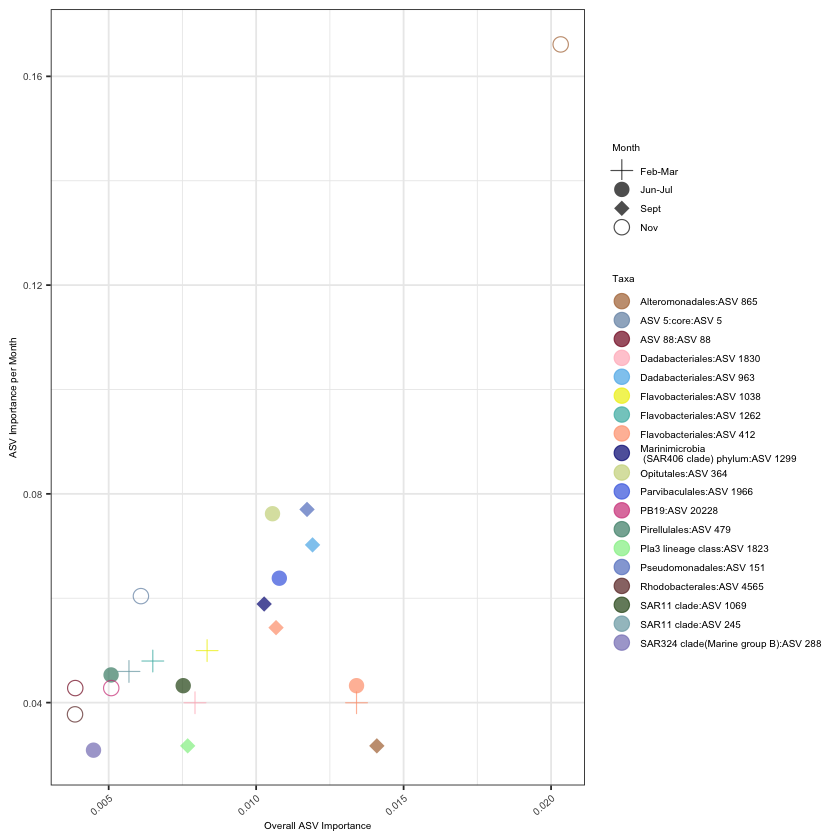

In [22]:
fig_rf_trip=rf_trip_df%>%
mutate(order= paste(order:ASV, sep = ":"))  %>%
mutate_if(is.character, stringr::str_replace_all, pattern = "ASV_", replacement = "ASV ") %>%
mutate_if(is.character, stringr::str_replace_all, pattern = "Marinimicrobia", replacement = "Marinimicrobia\n") %>%

ggplot(
           aes(x=all, y = value)) + 

 
geom_point(aes(shape=Month, color=order), alpha=0.7,
          size=4) +
scale_color_manual("Taxa", values=c( "#AD6F3B", "#6F8FAF", "#800020", "lightpink", "#56B4E9", "yellow2", "#40B5AD",
                                    "lightsalmon", "#000080", "#CBD588", "royalblue", "#D14285", "aquamarine4", "lightgreen", 
                                    "#5F7FC7", "#652926", "#274e13","#76a5af","#837dbe", "#ed8655", "lightgreen",
                           "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD")) +
scale_shape_manual("Month", values=c(3, 16, 18,1,2),  labels= lab1) +
ylab("ASV Importance per Month") +
xlab("Overall ASV Importance") +
theme_bw() +
#guides(fill = guide_legend(keywidth = 1, , keyheight =.0, ncol=1)) +
theme(legend.text =element_text(size=6)) +
theme(legend.title = element_text(size=6),
    # legend.position = "top"
     ) +
  guides(shape = guide_legend(keywidth = .01, keyheight = .01, ncol=1, 
                             order = 1),
         color = guide_legend(order = 2, ncol=1, 
         keywidth = 0.40,  keyheight = 0.30,
                             #title.position = "top", 
                              #title.hjust = 3
                             )) +
theme(axis.text.x=element_text(angle = 40, hjust=1)) +
theme(strip.text.x = element_text(size=6)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6)) +
theme(axis.title.x = element_text(size =6)) +
theme(axis.title.y = element_text(size = 6)) 
fig_rf_trip

#ggsave(filename = "/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/rf_month.svg",
 #      plot = fig_rf_trip,
  #     width = 5,
   #    height = 5,
    #   units = "in")

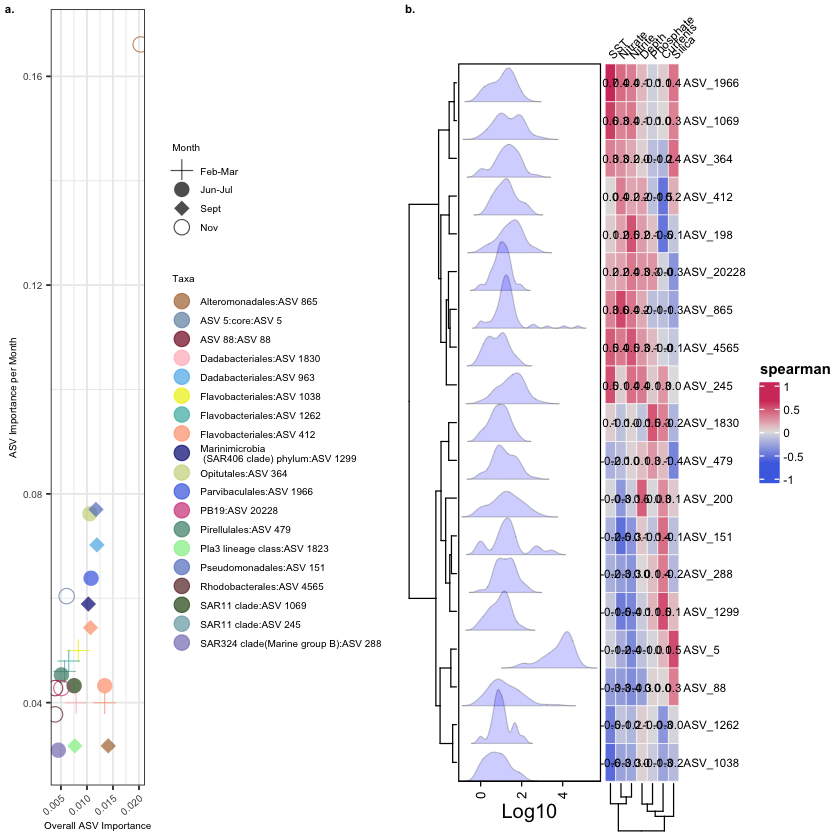

In [45]:
ggpubr::ggarrange(fig_rf_trip, gg_rf_month,
                  common.legend = FALSE, nrow=1,
                labels = c("a.", "b."), font.label = list(size = 7),
                widths = c(1, 1.1) 
                 # heights=c(0.8,1.3)
                 )

#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/Fig5.svg", 
 #    width = 8, height = 4.5, units = "in", dpi=300)

#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/Fig5.png", 
 #    width = 8, height = 5, units = "in", dpi=300)

,X1,X2,Correlation,p.adj
,<fct>,<fct>,<dbl>,<dbl>
112,ASV_1966,SST,0.6747291,1.547827e-15
108,ASV_1069,SST,0.5947143,2.715219e-11
30,ASV_865,Nitrate,0.5639161,4.918086e-10
107,ASV_1038,SST,-0.5570672,7.345862e-10
78,ASV_5,Silica,0.5425839,2.398113e-09
15,ASV_1299,Currents,0.5366421,3.490852e-09


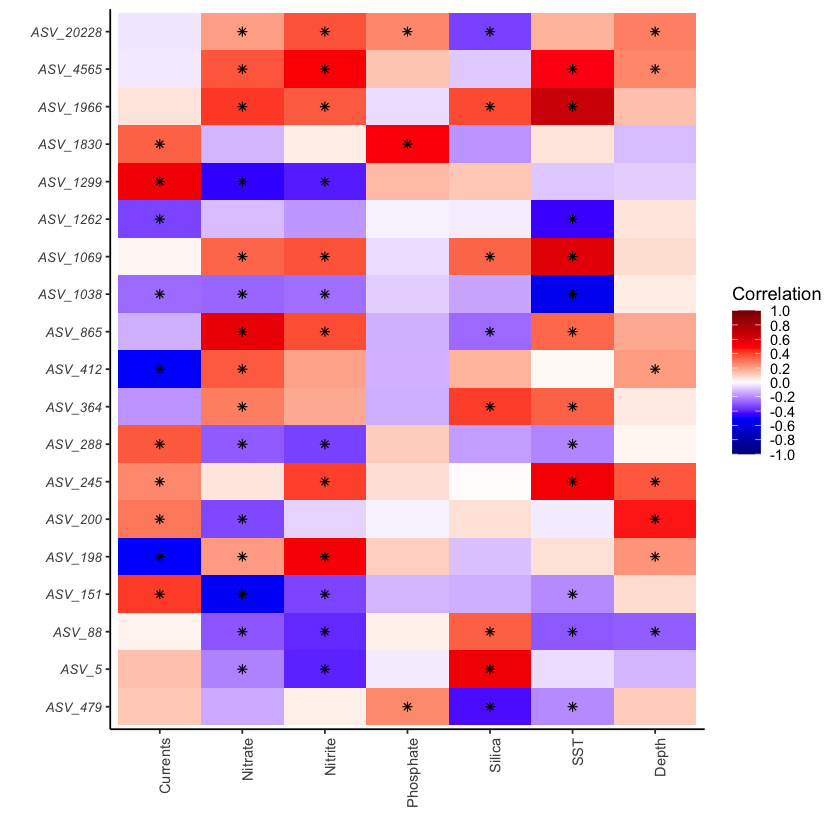

In [24]:
# data to correlate
x <- log10(otu_table(t(ps_fill_tax))) 

y <- as.matrix(ps_fill_tax_meta[4:10]) 

# Correlate data sets 

correlation.table <- associate(x, y, method = "spearman", mode = "table", p.adj.threshold = 0.05, n.signif = 1) #%>% 
#rename(ASVs=X1) %>% 
#rename(Env=X2) %>% 
#left_join(taxo_ASVs) 
(head(correlation.table))

subtable <- filter(correlation.table, p.adj < 0.05)

# figure
correlation.table %>%
ggplot(aes(x = X2, y = X1, fill = Correlation)) + geom_tile(aes(fill = Correlation)) + 
geom_point(
    data = function(x) filter(x, p.adj < 0.05),
    shape = "asterisk"
  ) +
theme_classic() +
 scale_fill_gradientn("Correlation", 
                       breaks = seq(from = -1, to = 1, by = 0.2), 
                   colours = c("darkblue", "blue", "white", "red", "darkred"), 
                   limits = c(-1,1)) +
theme(axis.text.x=element_text(angle = 90, hjust=1),
               axis.text.y=element_text(size = 8, , face = "italic")) +
 xlab("") + ylab("")

Warning message in psmelt(.):
“The sample variables: 
order, species
 have been renamed to: 
sample_order, sample_species
to avoid conflicts with taxonomic rank names.”


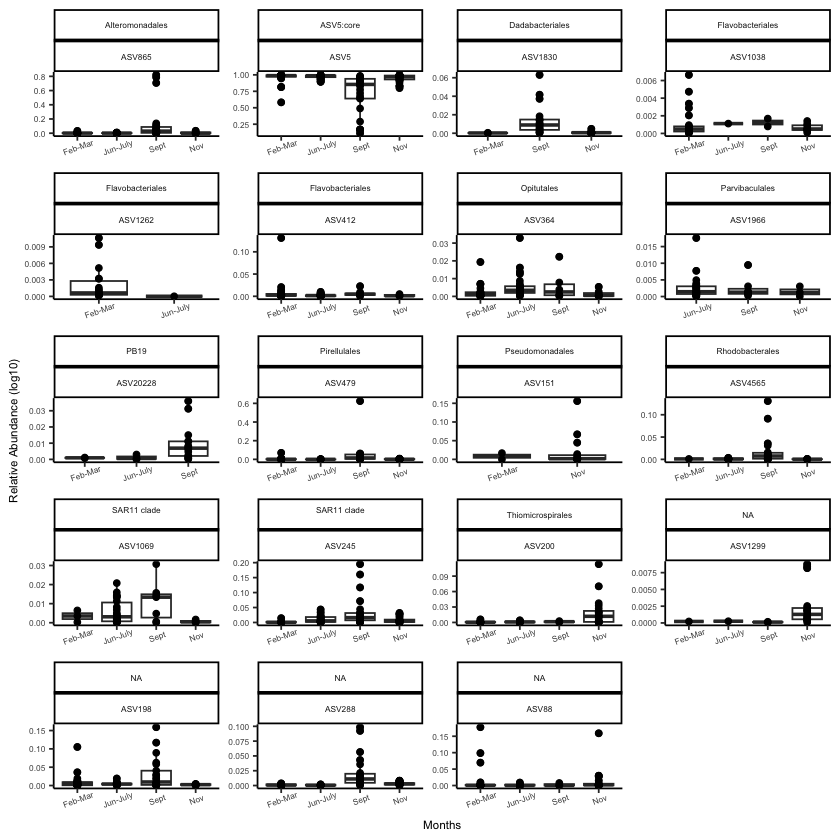

In [25]:


ps_fill_tax %>% 
  # tax_glom(taxrank = "species") %>%
  transform_sample_counts(~ .x / sum(.x)) %>% # Transform to relative abundance
  psmelt() %>%
  filter(Abundance != 0) %>%
  mutate(across(where(is.character), ~ str_replace_all(., c(
    "o__" = "",
    "phylum" = "",
    "ASV_" = "ASV",
    "clade" = "clade\n",
    "Marinimicrobia" = "Marinimicrobia\n"
  )))) %>%
  ggplot(aes(x = Samp_trip, y = Abundance)) +
  geom_boxplot() +
  geom_point() +
  facet_wrap(~ order + OTU, scales = "free", nrow = 5) +
  scale_x_discrete(name = "Months", labels = c(
    "Trip_2" = "Feb-Mar", 
    "Trip_3" = "Jun-July",
    "Trip_4" = "Sept", 
    "Trip_5" = "Nov"
  )) +
  theme_classic() +
  theme(
    strip.text.x = element_text(size = 5),
    axis.text.x = element_text(size = 5, angle = 20),
    axis.text.y = element_text(size = 5),
    axis.title.x = element_text(size = 7),
    axis.title.y = element_text(size = 7)
  ) +
  ylab("Relative Abundance (log10)")


### Dispersion Figure

In [26]:
# transform data into CLR
ps_clr <- microbiome::transform(ps_fill, 'clr')

ps_veg <- vegdist(otu_table(t(ps_clr)), method ="euclidean")

mod_geno <- betadisper(ps_veg, sample_data(ps_clr)$Genotype)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)

mod_dist= as.data.frame(mod_geno$distances)
dim(mod_dist)
mod_dist_df=cbind(sample_data(ps_clr), mod_dist) 

[1] 124   1

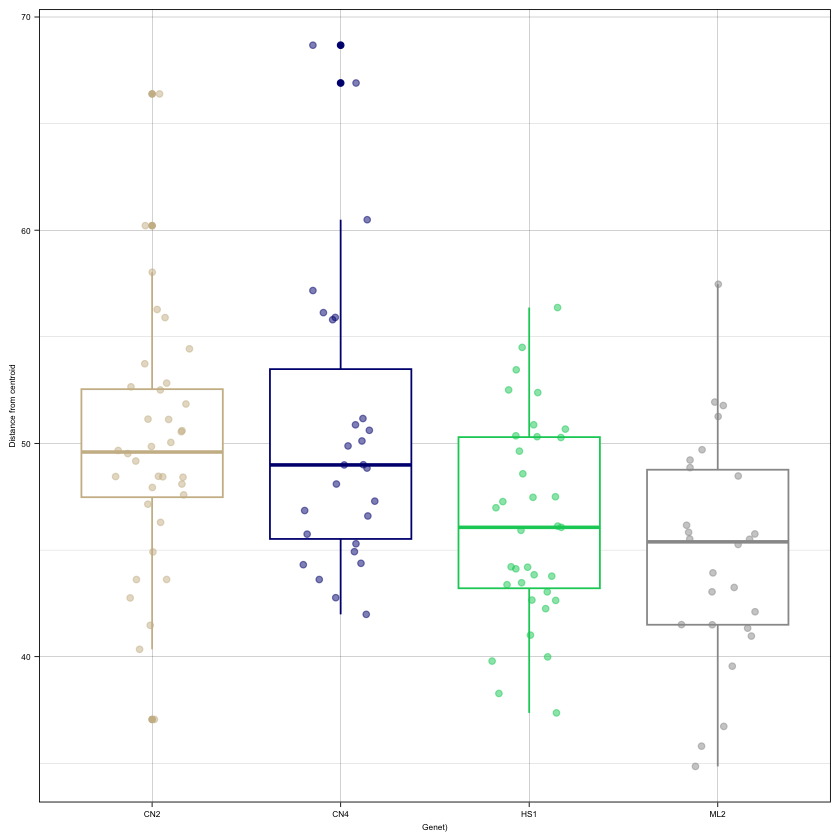

In [27]:
#Figure for dispersion
fig_dis = ggplot(mod_dist_df,
       aes(x=Genotype, y=mod_geno$distances)) +
geom_boxplot(aes(color=Genotype)) +
geom_jitter(aes(color=Genotype), alpha=0.5, height = 0, width = .2) +
#scale_shape_manual("Reef", values = c(3, 16, 18, 18), , labels= lab2) +
#scale_color_manual(values = c("#274e13","#76a5af","#837dbe", "#ed8655" )) +
scale_color_manual(values = c("wheat3","navy","springgreen3", "grey60" )) +
theme_linedraw() +
theme(axis.text.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size = 5)) +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=5)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
#theme(axis.title.x = element_blank()) +
#theme(axis.text.x = element_blank()) +
theme(legend.position="none") +
ylab("Distance from centroid") +
xlab("Genet)")

fig_dis

### Alpha diverity figure

In [28]:
#Remove any ASVs that are zero across samples 
ps_fill_alpha= filter_taxa(ps_merge, function(x) sum(x > 0) > (0.0*length(x)), TRUE)
ps_fill_alpha

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 26869 taxa and 124 samples ]:
sample_data() Sample Data:        [ 124 samples by 58 sample variables ]:
tax_table()   Taxonomy Table:     [ 26869 taxa by 7 taxonomic ranks ]:
taxa are rows

In [29]:
#Rarefy data for alpha-diversity
(ps_fill_rare <- phyloseq::rarefy_even_depth(ps_fill_alpha, rngseed = 123, replace = FALSE, sample.size=15000))             

`set.seed(123)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(123); .Random.seed` for the full vector

...

6541OTUs were removed because they are no longer 
present in any sample after random subsampling


...



phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 20328 taxa and 124 samples ]:
sample_data() Sample Data:        [ 124 samples by 58 sample variables ]:
tax_table()   Taxonomy Table:     [ 20328 taxa by 7 taxonomic ranks ]:
taxa are rows

In [30]:
#Generate Shannon diversity index
adiv <- data.frame(
  "Shannon" = phyloseq::estimate_richness(ps_fill_rare, measures = "Shannon")) %>% 
rownames_to_column("sample_bag") #sample_bag is the unique sample identifier 
head(adiv)

,sample_bag,Shannon
,<chr>,<dbl>
1,ML2_78_cf_Trip_3,2.144486
2,CN4_35_cf_Trip_3,4.487037
3,CN4_25_cf_Trip_3,2.806583
4,HS1_18_cf_Trip_3,2.780941
5,HS1_17_cf_Trip_3,4.011722
6,HS1_15_cf_Trip_3,3.510937


In [31]:
#transform Shannon values to normalize
adiv_trans =adiv %>%
mutate(Shannon_trans = log10(Shannon))
head(adiv_trans, n=2)

alpha_all=cbind(mod_dist_df, adiv_trans)
dim(alpha_all)
head(alpha_all, n=2)

,sample_bag,Shannon,Shannon_trans
,<chr>,<dbl>,<dbl>
1,ML2_78_cf_Trip_3,2.144486,0.3313232
2,CN4_35_cf_Trip_3,4.487037,0.6519596


[1] 124  62

,collection_date,Currents,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,Fragment_number,Month,⋯,Lat_decimal,Long_decimal,Chlorophyll.a,sdchla_mgm.3,SST,sdSST_degC,mod_geno$distances,sample_bag,Shannon,Shannon_trans
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
ML2_78_cf_Trip_3,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,NA,June,⋯,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,45.51832,ML2_78_cf_Trip_3,2.144486,0.3313232
CN4_35_cf_Trip_3,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,NA,June,⋯,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,48.99985,CN4_35_cf_Trip_3,4.487037,0.6519596


In [32]:
ps_ra_meta= as(sample_data(ps_fill_rare), "data.frame")
ps_ra_meta_envs = ps_ra_meta %>% select("Genotype", "Samp_trip", "reef",'Currents', 'Nitrite',
                                        'Nitrate', 'Phosphate',
                                        'Silica',
                "SST", "Chlorophyll.a", "Depth", "Survivorship")

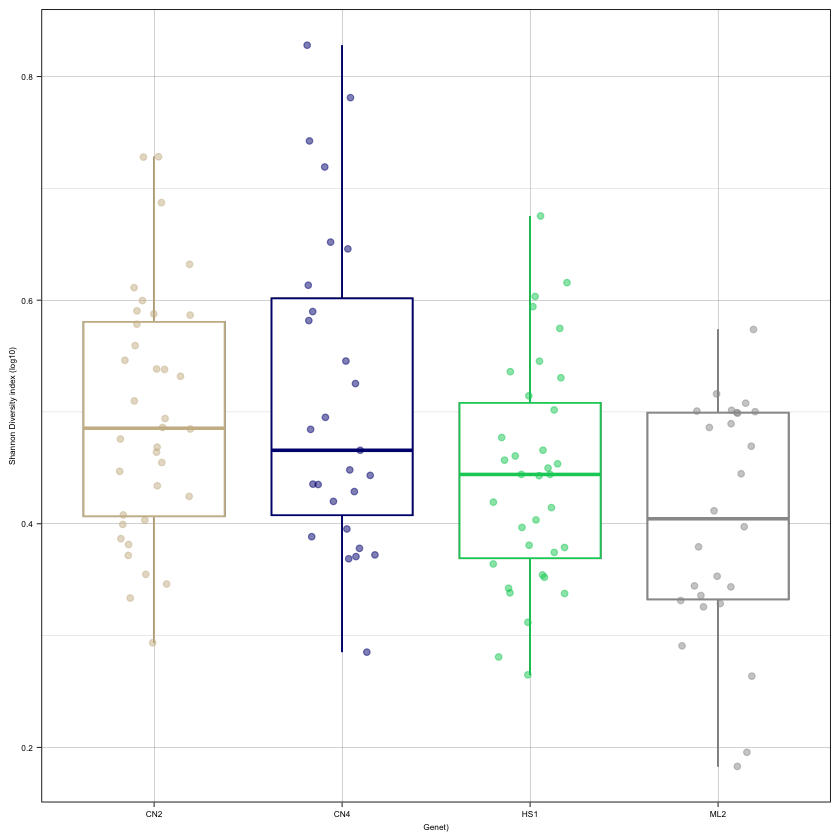

In [33]:
#Figure Shannon diversity 

fig_alpha = alpha_all %>%
 ggplot(aes(x = Genotype, y = Shannon_trans))  +
  geom_boxplot(outlier.color = NA)  +
geom_boxplot(aes(color=Genotype)) +
geom_jitter(aes(color=Genotype), alpha=0.5, height = 0, width = .2) +
#scale_shape_manual("Reef", values = c(3, 16, 18, 18), labels= lab2) +
#scale_color_manual(values = c("#274e13","#76a5af","#837dbe", "#ed8655" )) +
scale_color_manual(values = c("wheat3","navy","springgreen3", "grey60" )) +
theme_linedraw() +
theme(axis.text.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size = 5)) +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=5)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
theme(legend.position="none") +
ylab("Shannon Diversity index (log10)") +
xlab("Genet)")
fig_alpha

### Phylogenetic tree of core bacteria

parent,node,branch.length,label
<int>,<int>,<dbl>,<chr>
33,1,0.01289045,ASV_2700
37,2,0.33541769,ASV_10973
37,3,0.11296898,ASV_11820
38,4,0.27898357,ASV_8611
38,5,0.09393845,ASV_11176
40,6,0.20102123,ASV_10183


[1] 63  4

parent,node,branch.length,label,domain,phylum,class,order,family,genus,species
<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
33,1,0.01289045,ASV_2700,Bacteria,Proteobacteria,Gammaproteobacteria,NA,NA,NA,NA
37,2,0.33541769,Alteromonadaceae,Bacteria,Proteobacteria,Gammaproteobacteria,Alteromonadales,Alteromonadaceae,Alteromonadaceae,NA
37,3,0.11296898,Cellvibrionaceae,Bacteria,Proteobacteria,Gammaproteobacteria,Cellvibrionales,Cellvibrionaceae,Cellvibrionaceae,NA
38,4,0.27898357,Vibrionaceae,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrionaceae,NA
38,5,0.09393845,ASV_11176,Bacteria,Proteobacteria,Gammaproteobacteria,NA,NA,NA,NA
40,6,0.20102123,Pseudoalteromonadaceae,Bacteria,Proteobacteria,Gammaproteobacteria,Alteromonadales,Pseudoalteromonadaceae,Pseudoalteromonadaceae,NA


parent,node,branch.length,label
<int>,<int>,<dbl>,<chr>
61,32,1e-08,ASV_23


parent,node,branch.length,label
<int>,<int>,<dbl>,<chr>
58,25,0.5085334,ASV_5


parent,node,branch.length,label
<int>,<int>,<dbl>,<chr>
49,21,1e-08,ASV_6


parent,node,branch.length,label
<int>,<int>,<dbl>,<chr>
45,13,0.4182173,ASV_7


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Warning message:
“The following aesthetics were dropped during statistical transformation: node, parent, branch.length,
x, and y.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: node, parent, branch.length,
x, and y.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: node, parent, branch.length,
x, and y.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a

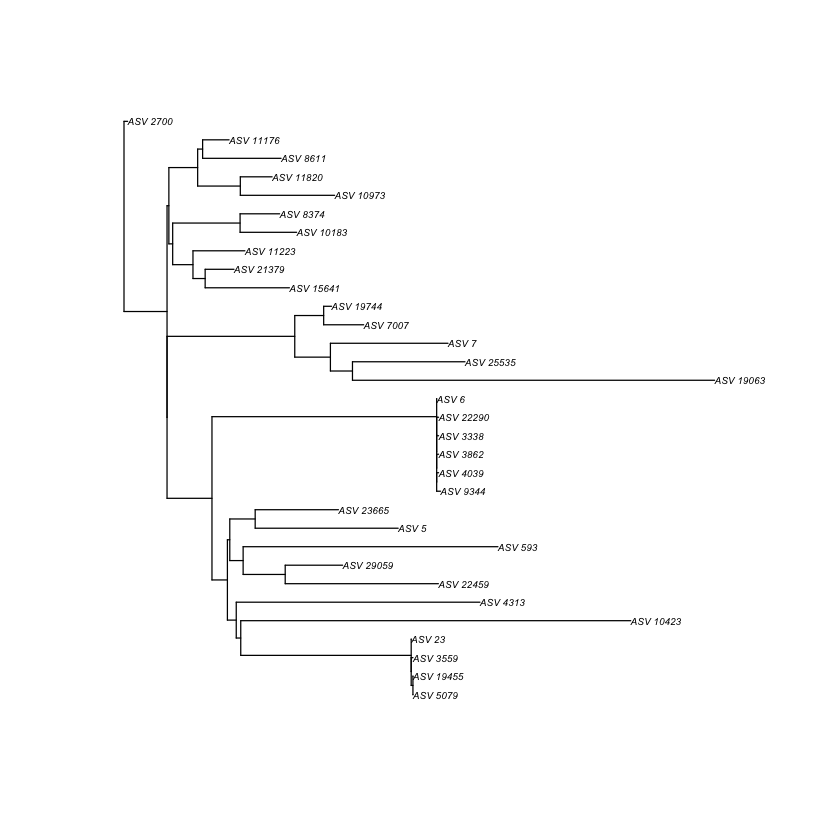

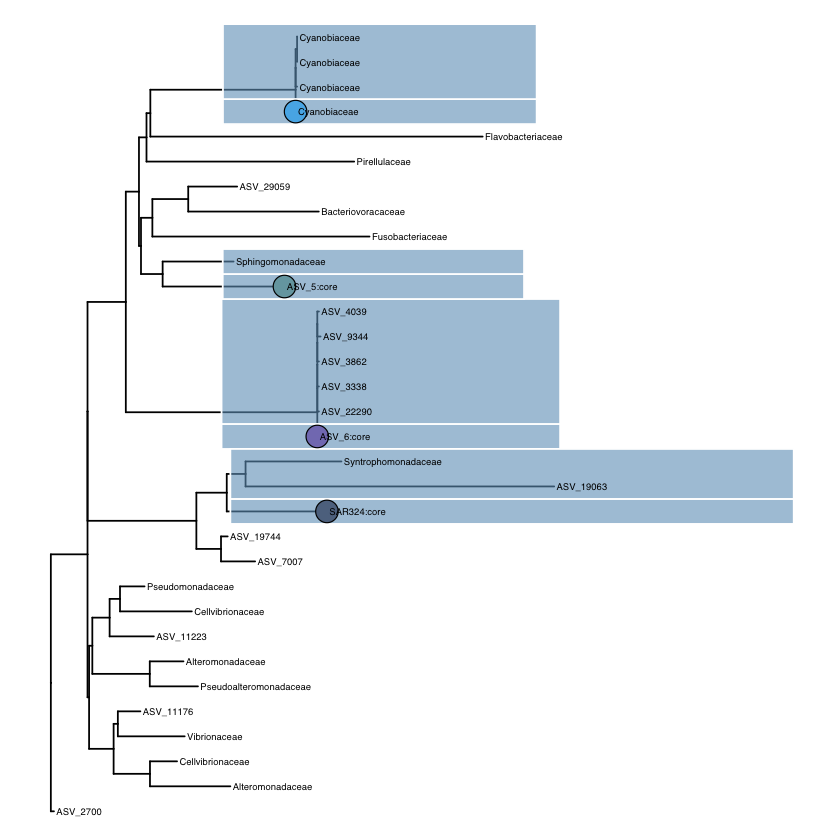

In [42]:
library(treeio)
library(ggtree)
library(ape)
library("phangorn")
library(phytools)
library(tidytree)


set.seed(10)
target <- c("ASV_5", 'ASV_6', 'ASV_7','ASV_23')

#tree <- phytools::read.newick('rosales/gtdbtk.bac12016BINS.classify.tree')
tree <- phytools::read.newick('/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_fitgtr_tree')
inds <- which(tree$tip.label %in% target)

ans <- NULL
depth_nodes <- 5
max_sisters <- 5
for(x in inds) {
  now <- x
  temp <- NULL
  temp1 <- NULL
  for(y in 1:depth_nodes) {
    temp <- Descendants(tree,Siblings(tree,now)[[1]])[[1]]
    temp <- temp[!temp %in% c(temp1,inds)]
    temp <- sample(temp, min(length(temp), max_sisters))
    temp1 <- c(temp,temp1)
    now <- Ancestors(tree,now,'parent')
  }
  ans <- unique(c(ans,temp1))
}

newtree <- keep.tip(tree,c(ans,inds))
plot(ladderize(newtree),cex=0.5)


#make tree into tibble
x <- as_tibble(newtree) #%>%
 #rownames_to_column %>%
#column_to_rownames("rowname")  %>%
 #mutate(across('label', str_replace, "ASV_5$", "ASV_5:core")) %>%
  # mutate(across('label', str_replace, "ASV_6$", "ASV_6:core")) %>%
   #mutate(across('label', str_replace, "ASV_7$", "SAR324:core")) %>%
#mutate(across('label', str_replace, "ASV_23$", "Cyanobiaceae:core")) 
#rename (ASVs=label)
head(x)
dim(x)

taxa_for_tree = taxo_mat %>% 
as.data.frame() %>%
rownames_to_column("label") 

y = x %>% left_join(taxa_for_tree, "label") %>% mutate(label = coalesce(family, label)) #%>%
#mutate(across('label', str_replace, "ASV_5$", "ASV_5:core")) %>%
 # mutate(across('label', str_replace, "ASV_6$", "ASV_6:core")) #%>%
   #mutate(across('label', str_replace, "ASV_7$", "SAR324:core")) #%>%
#mutate(if_else('label', str_replace, "ASV_23", "Cyanobiaceae:core"))

head(y)


target <- c("ASV_5:core", 'ASV_6:core', 'SAR324:core','ASV_23')

x %>%
as_tibble() %>%
filter(label == 'ASV_23') 

x %>%
as_tibble() %>%
filter(label == "ASV_5") 

x %>%
as_tibble() %>%
filter(label == "ASV_6") 

x %>%
as_tibble() %>%
filter(label == "ASV_7") 

#"ASV_6:core", "SAR324:core", "Cyanobiaceae:core"))


d <- data.frame(nodes=c(49, 25, 21, 13), type=c("A", "B", "C", "D"))
fig_tree=y %>% 
as.phylo %>%
ggtree() +
geom_balance(node=49, fill='#6D9EC1', color='white', alpha=0.6, extend=1) +
geom_balance(node=45, fill='#6D9EC1', color='white', alpha=0.6, extend=1) +
geom_balance(node=58, fill='#6D9EC1', color='white', alpha=0.6, extend=1) +
geom_balance(node=61, fill='#6D9EC1', color='white', alpha=0.6, extend=1) +
geom_point2(aes(subset=(node==32)), shape=21, size=6, fill='#56B4E9') +
geom_point2(aes(subset=(node==25)), shape=21, size=6, fill='#76a5af') +
geom_point2(aes(subset=(node==21)), shape=21, size=6, fill='#837dbe') +
geom_point2(aes(subset=(node==13)), shape=21, size=6, fill="#5E738F") +

#geom_tiplab(size=1.9) +
geom_tiplab(size=2) 
fig_tree

Warning message:
“The following aesthetics were dropped during statistical transformation: node, parent, branch.length,
x, and y.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: node, parent, branch.length,
x, and y.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: node, parent, branch.length,
x, and y.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics wer

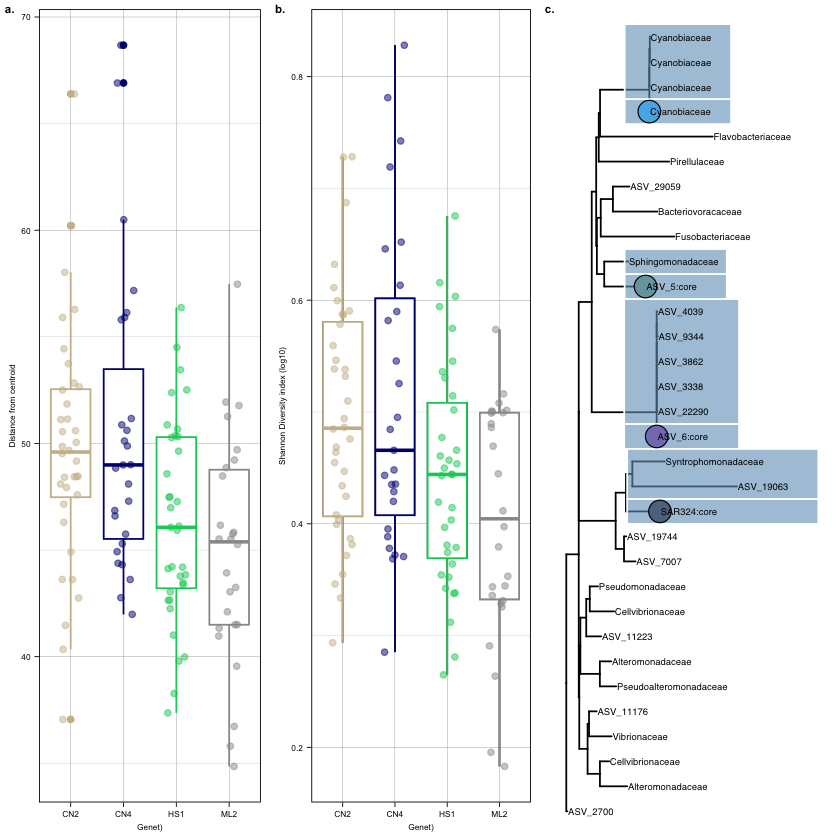

In [35]:
comboABC= ggpubr::ggarrange(fig_dis, fig_alpha,
                  common.legend = FALSE, nrow=1,
                labels = c("a.", "b."), font.label = list(size = 7))

ggpubr::ggarrange(comboABC, fig_tree,
                  common.legend = FALSE, nrow=1, widths = c(1.8, 1), heights=c(1,.7),
                labels = c("", "c."), font.label = list(size = 7))

ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/supl_fig3.png", 
      width = 6, height = 4, units = "in", dpi=300)

In [36]:
#Remove the two samples that did not have depth information
#ps_fill_tax =  subset_samples(ps_fill_tax, Depth!= "NA")
#ps_fill_tax

In [37]:
#Select Metadata of interest 
#ps_fill_tax_meta= data.frame(sample_data(ps_fill_tax)) %>% 
#select("Genotype", "Samp_trip", "reef", 'Currents', 'Nitrate', 'Nitrite', 'Phosphate', 'Silica',
#                 "SST", "Depth")

#colnames(ps_fill_tax_meta)

## Alpha-diversity correlations with habitat factors

In [38]:

y_columns <- names(ps_ra_meta_envs[3:12])
y_columns
head(ps_ra_meta_envs)

[1] "reef"          "Currents"      "Nitrite"       "Nitrate"      
 [5] "Phosphate"     "Silica"        "SST"           "Chlorophyll.a"
 [9] "Depth"         "Survivorship"

,Genotype,Samp_trip,reef,Currents,Nitrite,Nitrate,Phosphate,Silica,SST,Chlorophyll.a,Depth,Survivorship
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ML2_78_cf_Trip_3,ML2,Trip_3,cf,4.852118,0.032,0.861,0.0685,0.706,29.63623,1.792092,-20.9,0.3571429
CN4_35_cf_Trip_3,CN4,Trip_3,cf,4.852118,0.032,0.861,0.0685,0.706,29.63623,1.792092,-17.9,0.6428571
CN4_25_cf_Trip_3,CN4,Trip_3,cf,4.852118,0.032,0.861,0.0685,0.706,29.63623,1.792092,-20.8,0.6428571
HS1_18_cf_Trip_3,HS1,Trip_3,cf,4.852118,0.032,0.861,0.0685,0.706,29.63623,1.792092,-18.8,0.7619048
HS1_17_cf_Trip_3,HS1,Trip_3,cf,4.852118,0.032,0.861,0.0685,0.706,29.63623,1.792092,-17.8,0.7619048
HS1_15_cf_Trip_3,HS1,Trip_3,cf,4.852118,0.032,0.861,0.0685,0.706,29.63623,1.792092,-17.6,0.7619048


Warning message:
“The dot-dot notation (`..rr.label..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(rr.label)` instead.”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The `scale_name` argument of `continuous_scale()` is deprecated as of ggplot2 3.5.0.”
Warning message:
“The `trans` argument of `continuous_scale()` is deprecated as of ggplot2 3.5.0.
ℹ Please use the `transform` argument instead.”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_poly_eq()`).”
Warning message:
“Removed 1 row containing non-finite outs

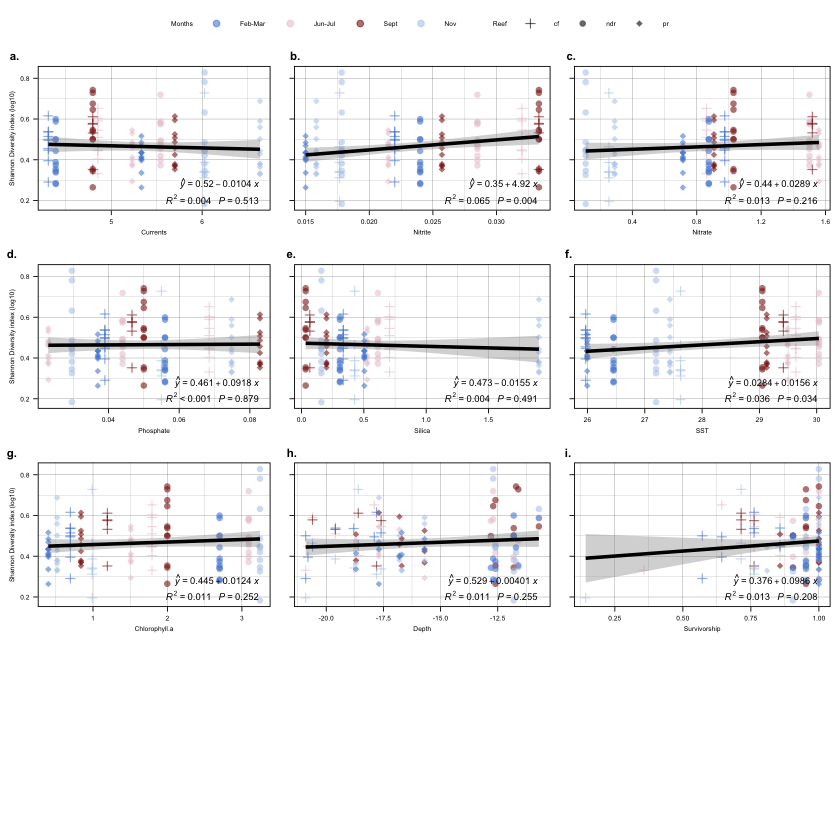

In [39]:
library(ggpubr)


# Create an empty list to store the plots
plots <- list()

# Create a shared plot with geom_smooth and geom_point
shared_plot <- alpha_all %>%
  ggplot(aes(x = .data[[y_columns[1]]], y = Shannon_trans, color = Samp_trip), size=0.5) +
  geom_point(aes(color = Samp_trip, shape = reef), alpha = .6) +
  theme_bw() +

  geom_smooth(method = 'lm', color = 'black') +
stat_poly_eq(
    formula = y ~ x,
    eq.with.lhs = "italic(hat(y))~`=`~",
    aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
    parse = TRUE,
    label.y = "bottom",
    label.x = "right",
    color = "black",
    rr.digits = 3,
    size = 2
  ) +
  stat_poly_eq(
    aes(label = paste(..eq.label.., sep = "~~~")),
    label.y = 0.15,
    eq.with.lhs = "italic(hat(y))~`=`~",
    eq.x.rhs = "~italic(x)",
    formula = y ~ x,
    parse = TRUE,
    size = 2,
    label.x = "right",
    color = "black"
  ) +
  scale_shape_manual("Reef", values = c(3, 16, 18, 18)) +
 scale_color_manual("Months", values=c("#558bd9", "#EBCBD3", "#8c1c13", "#b6cdee"),  labels= lab1) +
  theme_linedraw() +
  theme(legend.text = element_text(size = 4)) +
  theme(legend.title = element_text(size = 4)) +
  theme(axis.title.x = element_text(size = 4)) +
  theme(axis.text.x = element_text(size = 4)) +
  theme(axis.text.y = element_text(size = 4)) +
  theme(axis.title.y = element_text(size = 4))

# Loop through each y variable (starting from the second one) and create a plot
for (i in 1:length(y_columns[-1])) {
  y_var <- y_columns[-1][i]
  
  plot <- shared_plot +
    aes(x = .data[[y_var]]) +  # Modify the x-axis variable
    theme(plot.margin = margin(0.4, 0.2, 0.2, 0.2, "cm"))  # Reduce plot margin to avoid clipping
  
  # Remove legend for individual plots
  plot <- plot + theme(legend.position = "none") 
  
  # Remove y-axis title for specified figures
  if (i %in% c(2, 3, 5, 6, 8, 9)) {
    plot <- plot + theme(axis.title.y = element_blank()) + theme(axis.text.y = element_blank()) 
  }
  
  # Add the plot to the list
  plots[[y_var]] <- plot
  
  # Modify ylab for figures "A" and "E"
  if (i %in% c(1, 4, 7)) {
    plots[[y_var]] <- plots[[y_var]] + ylab("Shannon Diversity index (log10)") + theme(axis.text.x = element_text(size = 4)) 
  }
}

# Arrange plots using ggarange
combined_plot <- ggpubr::ggarrange(plotlist = plots, ncol = 3, nrow = 4, common.legend = TRUE,
                labels = c(" a.", " b.", "c. ", "d. ", "e. ", "f. ", "g. ", "h. ", "i. "), font.label = list(size = 7),
               legend="top")

# Print the combined plot
print(combined_plot)


#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/suppl_fig6.png", 
 #     width = 5, height = 5.5, units = "in", dpi=300)

Warning message in psmelt(.):
“The sample variables: 
order, species
 have been renamed to: 
sample_order, sample_species
to avoid conflicts with taxonomic rank names.”


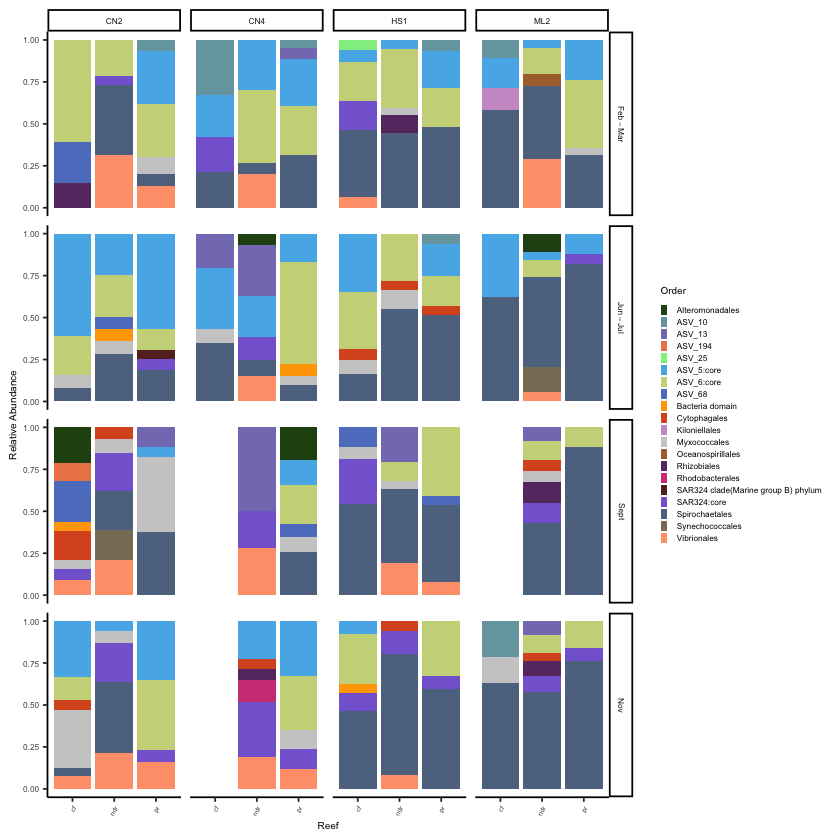

In [40]:
#Relative abundance figure

sum_ps   <- ps_fill %>%
  tax_glom(taxrank = "order") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()
supp.labs <- as_labeller(c(Trip_2="Feb-Mar", Trip_3="Jun-Jul", Trip_4="Sept", Trip_5="Nov"),
                           default = label_parsed)
fig_ra= sum_ps %>%
filter(Abundance>=0.1) %>%
ggplot(aes(x =reef, y=Abundance, fill=order)) + 
       
geom_bar(stat="identity", position="fill", aes(fill = order)) + 
#facet_grid(Samp_trip~Genotype, scales = "free") +
facet_grid(Samp_trip~Genotype, space="free", labeller = labeller(Samp_trip= supp.labs)) +
scale_fill_manual("Order",values=c("#274e13","#76a5af","#837dbe", "#ed8655", "lightgreen",
                           "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.50, ncol=1)) +
theme_classic() +

theme(axis.text.x = element_text(angle = 60, hjust = 1, size=8)) +
ylab("Relative Abundance") +
xlab("Reef") +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=6)) +
theme(axis.title.x = element_text(size = 6)) +
theme(axis.title.y = element_text(size = 6)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =5)) +
theme(strip.text.x = element_text(size =5)) +
theme(strip.text.y = element_text(size =5)) 




ggpubr::ggarrange(fig_ra,
                  common.legend = FALSE,
                 font.label = list(size = 7))

#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/supl_fig4.png", 
 #     width = 5, height = 4, units = "in", dpi=300)

,Nitrite,SST,Nitrate,Phosphate,Currents,Silica,Depth,Survivorship
Nitrite,1.0,0.7,0.6,0.2,-0.5,-0.4,0.2,-0.2
SST,0.7,1.0,0.6,0.1,0.1,-0.1,0.1,0.0
Nitrate,0.6,0.6,1.0,-0.2,-0.5,-0.3,0.0,0.0
Phosphate,0.2,0.1,-0.2,1.0,0.2,0.4,-0.2,-0.1
Currents,-0.5,0.1,-0.5,0.2,1.0,0.6,0.0,0.2
Silica,-0.4,-0.1,-0.3,0.4,0.6,1.0,-0.3,0.1


,Nitrite,SST,Nitrate,Phosphate,Currents,Silica,Depth,Survivorship
Nitrite,0.000000e+00,3.133374e-50,5.518612e-36,1.032196e-04,3.742661e-27,8.073802e-16,1.499600e-03,2.964253e-06
SST,3.133374e-50,0.000000e+00,1.693510e-35,1.822751e-02,1.201515e-01,3.051057e-01,3.402776e-01,9.928673e-01
Nitrate,5.518612e-36,1.693510e-35,0.000000e+00,1.868407e-06,3.830614e-27,4.056235e-07,7.669027e-01,3.718958e-01
Phosphate,1.032196e-04,1.822751e-02,1.868407e-06,0.000000e+00,1.758682e-05,6.321373e-14,3.091993e-04,1.068906e-02
Currents,3.742661e-27,1.201515e-01,3.830614e-27,1.758682e-05,0.000000e+00,1.899854e-33,8.067153e-01,3.180878e-06
Silica,8.073802e-16,3.051057e-01,4.056235e-07,6.321373e-14,1.899854e-33,0.000000e+00,2.912381e-07,2.682166e-01


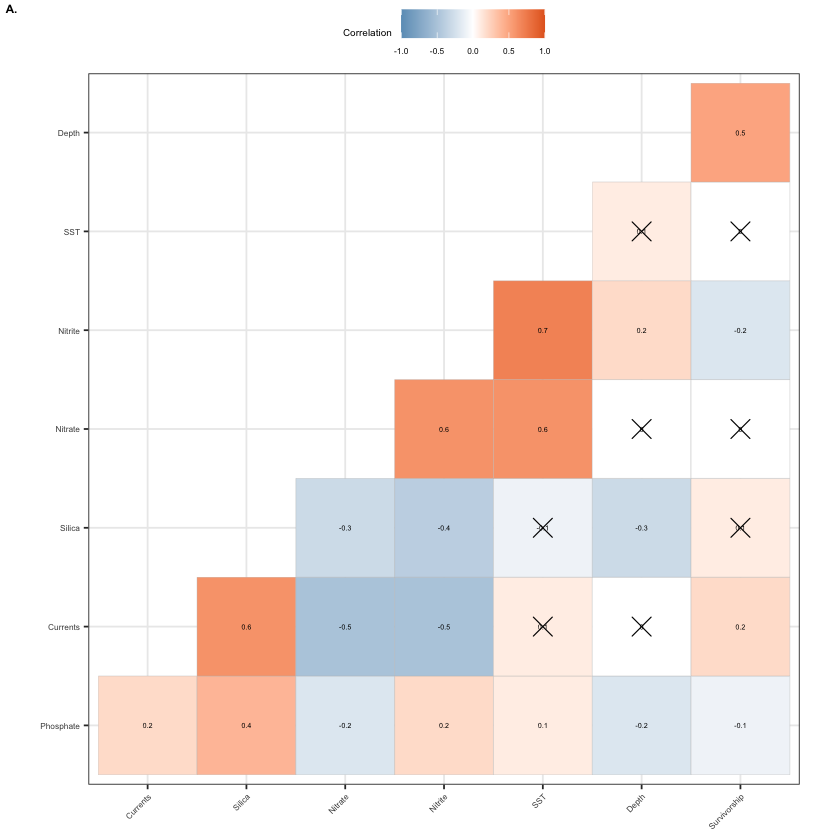

In [41]:
meta_envs= meta %>%
filter(Depth!= "NA") %>%
select("Genotype", "Samp_trip", "reef","Nitrite",
                               "SST",  "Nitrate", "Phosphate", "Currents", "Silica",
                                                "Depth", "Survivorship") 


corr <- round(cor(meta_envs[4:11]),1)
head(corr)


# Compute a matrix of correlation p-values
p.mat <- cor_pmat(meta_envs[4:11])
head(p.mat[, 1:8])

#Plot figure
fig_cor = ggcorrplot(corr, 
            hc.order = TRUE,
    type = "lower", p.mat = p.mat,  lab = TRUE,
          legend.title = "Correlation",
          colors = c("#6D9EC1", "white", "#E46726"),
           lab_size = 1.5,
                    ggtheme = ggplot2::theme_bw
                    ) +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=5)) +
theme(axis.text.x = element_text(size =5)) +
theme(axis.text.y = element_text(size =5)) +
guides(color = guide_legend(keywidth = 0.1, , keyheight =.10)) +
theme(legend.title= element_text(size=6),
      legend.margin = margin(0.1, 0, 0, 0),
      legend.spacing.x = unit(0.1, "mm"),
      legend.spacing.y = unit(0.1, "mm"),
     legend.position="top", legend.box = "vertical") 

fig_cor2=as.ggplot(fig_cor)

ggpubr::ggarrange(fig_cor2,
                  common.legend = FALSE, nrow=1,
                labels = c("A."), font.label = list(size = 7),
                widths = c(1, 1.5), align="h", legend="top", heights=c(1.2,1))

#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/supl_fig5.png", 
 #     width = 4, height = 4, units = "in", dpi=300)